# Exercise 1

Use all features to fitting model with same setting of sample code.

> 1. Don't plot data point scatter plots. (It is not feasible)
> 2. Only plot ROC curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model, metrics

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

# iris has two attributes: data, target
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [3]:
# for binary classification, set label 2 as true class while others are false class
iris.target[ iris.target != 2 ] = -1
iris.target[ iris.target == 2 ] = 1
iris.target[ iris.target == -1 ] = 0

In [4]:
# # Split the data into training/testing sets
d_train, d_test, t_train, t_test = model_selection.train_test_split(
  iris.data, iris.target, test_size=0.3, random_state=0)

# make model
C = 1
lr_model = linear_model.LogisticRegression(C=C)

In [5]:
# make model
C = 1
lr_model = linear_model.LogisticRegression(C=C)

# training model
lr_model.fit(d_train, t_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

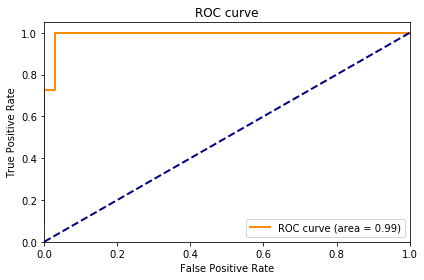

In [6]:
fig = plt.figure()

# plot roc curve for test set
pred_test = lr_model.predict_proba(d_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_true=t_test, y_score=pred_test)
roc_auc = metrics.auc(fpr, tpr)


subplot = fig.add_subplot(1, 1, 1)
subplot.set_title("ROC curve")
lw = 2
subplot.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
subplot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
subplot.set_xlim([0.0, 1.0])
subplot.set_ylim([0.0, 1.05])
subplot.set_xlabel('False Positive Rate')
subplot.set_ylabel('True Positive Rate')
subplot.legend(loc="lower right")


plt.tight_layout()
plt.show()

# Exercise 2

Do multiclass classification (3 classes) with same setting of sample code.

> 1. Don't plot ROC curve.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model, metrics

In [8]:
# Load the iris dataset
iris = datasets.load_iris()

# iris has two attributes: data, target
print(iris.data.shape)
print(iris.target.shape)

# in order to plot data, we select first two features
iris.data = iris.data[:,:2]

(150, 4)
(150,)


In [9]:
d_train, d_test, t_train, t_test = model_selection.train_test_split(
  iris.data, iris.target, test_size=0.3, random_state=0)

In [10]:
# make model
C = 1000
lr_model = linear_model.LogisticRegression(C=C)

# training model
lr_model.fit(d_train, t_train)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# calculation for plotting grid
h = 0.01
x_min, x_max = d_train[:, 0].min() - .5, d_train[:, 0].max() + .5
y_min, y_max = d_train[:, 1].min() - .5, d_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)

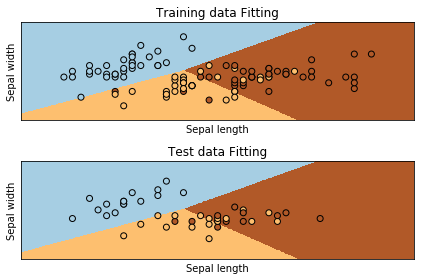

In [12]:
# plotting
fig = plt.figure()

# plot training set
subplot = fig.add_subplot(2, 1, 1)
subplot.set_title("Training data Fitting")
subplot.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

subplot.scatter(d_train[:, 0], d_train[:, 1], c=t_train, edgecolors='k', cmap=plt.cm.Paired)
subplot.set_xlabel('Sepal length')
subplot.set_ylabel('Sepal width')

subplot.set_xlim(xx.min(), xx.max())
subplot.set_ylim(yy.min(), yy.max())
subplot.set_xticks(())
subplot.set_yticks(())


# plot test set
subplot = fig.add_subplot(2, 1, 2)
subplot.set_title("Test data Fitting")
subplot.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

subplot.scatter(d_test[:, 0], d_test[:, 1], c=t_test, edgecolors='k', cmap=plt.cm.Paired)
subplot.set_xlabel('Sepal length')
subplot.set_ylabel('Sepal width')

subplot.set_xlim(xx.min(), xx.max())
subplot.set_ylim(yy.min(), yy.max())
subplot.set_xticks(())
subplot.set_yticks(())

plt.tight_layout()
plt.show()